In [2]:
# Packages we need
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load datasets

# TO DO
    # add a dateparse -> this slows down the process so, it will be done
file_path = "C:/Users/Guillaume/Desktop/Algorithmic Methods/ADM Datasets/2019-Oct.csv"
df_oct = pd.read_csv(file_path, nrows=10000, parse_dates=["event_time"])

file_path = "C:/Users/Guillaume/Desktop/Algorithmic Methods/ADM Datasets/2019-Nov.csv"
df_nov = pd.read_csv(file_path, nrows=10000, parse_dates=["event_time"])

# We append nov to oct
df = df_oct.append(df_nov)
# We remove duplicates
df = df.drop_duplicates()

# Split the column category_code into its different components
df[["category","sub-category","product"]] = df["category_code"].str.split(".", expand=True)

# Extract Weekday names
df["weekday"] = df["event_time"].dt.day_name()
# Extract Month_names
df["months"] = df["event_time"].dt.month_name()
print(df.head())

                 event_time event_type  product_id          category_id  \
0 2019-10-01 00:00:00+00:00       cart     5773203  1487580005134238553   
1 2019-10-01 00:00:03+00:00       cart     5773353  1487580005134238553   
2 2019-10-01 00:00:07+00:00       cart     5881589  2151191071051219817   
3 2019-10-01 00:00:07+00:00       cart     5723490  1487580005134238553   
4 2019-10-01 00:00:15+00:00       cart     5881449  1487580013522845895   

  category_code   brand  price    user_id  \
0           NaN  runail   2.62  463240011   
1           NaN  runail   2.62  463240011   
2           NaN  lovely  13.48  429681830   
3           NaN  runail   2.62  463240011   
4           NaN  lovely   0.56  429681830   

                           user_session category sub-category product  \
0  26dd6e6e-4dac-4778-8d2c-92e149dab885      NaN          NaN     NaN   
1  26dd6e6e-4dac-4778-8d2c-92e149dab885      NaN          NaN     NaN   
2  49e8d843-adf3-428b-a2c3-fe8bc6a307c9      NaN          N

# R1 Complete Funnels Rate
A marketing funnel describes your customer’s journey with your e-commerce. It may involve different stages, beginning when someone learns about your business, when he/she visits your website for the first time, to the purchasing stage, marketing funnels map routes to conversion and beyond. Suppose your funnel involves just three simple steps: 1) view, 2) cart, 3) purchase.

A complete funnel is the successive operations of view->cart->purchase realized during 1 session.

# R2 What are the categories of the most trending products overall? 

### For each month visualize this information through a plot showing the number of sold products per category. Plot the most visited subcategories

In [ ]:
df_purchased_cat = df[df["event_type"]=="purchase"]
#df_purchased_cat = df_purchased_cat[["category","sub-category","product"]].fillna("unknown")
df_purchased_cat = pd.DataFrame(df_purchased_cat.groupby(["category"]).product.count()).rename(columns={'product':'count_product'}).reset_index()

plot = sns.barplot(x="category", y = "count_product", data=df_purchased_cat)
#plt.show()

What are the 10 most sold products per category?

In [ ]:
df_purchase_product = df[df["event_type"]=="purchase"]
df_purchase_product = pd.DataFrame(df_purchase_product.groupby(["category","product"]).event_type.count())
#print(df_purchase_product.nlargest(10,["category","product"]))
print(df_purchase_product)

What to do with all the empty values

# R3
### For each category, what’s the brand whose prices are higher on average?

In [13]:
df_brand_avg_price = pd.DataFrame(df.groupby(["category","brand"]).price.mean())
df_cat_max_price = pd.DataFrame(df_brand_avg_price.max(level=[0]))
result = pd.merge(df_cat_max_price, df_brand_avg_price.reset_index(), how="left", on=["price"])
print(result.sort_values(by="price", ascending=False))

        price     category      brand
3  150.790000    furniture   kosmekka
2   74.299167   appliances        max
0   62.700000  accessories      vosev
1   10.288000      apparel   nitrimax
4    3.020000   stationery  depilflax


### Write a function that asks the user a category in input and returns a plot indicating the average price of the products sold by the brand.

In [14]:
def plot_avg_price_product_brand(category):

    df_brand_avg_price = pd.DataFrame(df.groupby(["category","brand"]).price.mean()).reset_index()
    df_plot = df_brand_avg_price[df_brand_avg_price["category"]==category]
    sns.scatterplot(data= df_plot, x="brand", y="price")
    plt.show()

### Find, for each category, the brand with the highest average price. Return all the results in ascending order by price.
that's the same as before

# R4
### How much does each brand earn per month?

In [26]:
df_revenue = df[df["event_type"] == "purchase"]
df_revenue = pd.DataFrame(df_revenue.groupby(["brand","product","price","months"]).event_type.count()).reset_index()
df_revenue["revenues"] = df_revenue["price"]*df_revenue["event_type"]
df_revenue = pd.DataFrame(df_revenue.groupby(["brand","months"]).revenues.sum()).reset_index()
print(df_revenue.head(10))

  brand   months  revenues
0   max  October     47.46


### Write a function that given the name of a brand in input returns, for each month, its profit. 

There is no way to access the cost - hence our only option to compute revenues

In [ ]:
def brand_revenues(brand):
    
    df_revenue = df[df["event_type"] == "purchase"]
    # Input
    df_revenue = df_revenue[df_revenue["brand"] == brand]
    
    df_revenue = pd.DataFrame(df_revenue.groupby(["brand","product","price","months"]).event_type.count()).reset_index()
    df_revenue["revenues"] = df_revenue["price"]*df_revenue["event_type"]
    df_revenue = pd.DataFrame(df_revenue.groupby(["brand","months"]).revenues.sum()).reset_index()
    
    return df_revenue
    
# What format should this take. It cannot stay a dataframe

### Is the average price of products of different brands significantly different?

First --> we need the average price of products for each brand.
Second --> A box plot is one option to visualize this difference

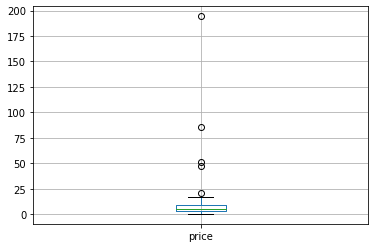

In [9]:
df_brand_avg_price = df[df["event_type"] == "purchase"]
df_brand_avg_price = pd.DataFrame(df_brand_avg_price.groupby(["brand"]).price.mean()).reset_index()
df_brand_avg_price.boxplot("price")

### Using the function you just created, find the top 3 brands that have suffered the biggest losses in earnings between one month and the next, specifing bothe the loss percentage and the 2 months (e.g., brand_1 lost 20% between march and april).

# R5 
In what part of the day is your store most visited?  Knowing which days of the week or even which hours of the day shoppers are likely to visit your online store and make a purchase may help you improve your strategies. 

### Create a plot that for each day of the week show the hourly average of visitors your store has.

In [ ]:
# First we group by session
df = pd.DataFrame(df.groupby(["user_session"]).event_time.min()).reset_index()
# Add the week day name
df["weekday"] = df["event_time"].dt.day_name()
# groupby weekday and count
df = pd.DataFrame(df.groupby(["weekday"]).user_session.count()).reset_index()
df["user_session"]=df["user_session"]/24

sns.barplot(data=df, x="weekday", y="user_session")
plt.show()

# R6
The conversion rate of a product is given by the number of times a product has been bought over the number of times it has been visited.

### What's the conversion rate of your online store? Find the overall conversion rate of your store.

In [12]:
df_1 = pd.DataFrame(df[df["event_type"]=="view"].groupby(["product"]).product.count())\
.rename(columns={'product':'Total_View'}).reset_index()
df_2 = pd.DataFrame(df[df["event_type"]=="purchase"].groupby(["product"]).product.count())\
.rename(columns={'product':'Total_Purchase'}).reset_index()

df_cvr = pd.merge(df_1,df_2, how="left", on=["product"]).fillna(0)
df_cvr["CVR %"] = round((df_cvr["Total_Purchase"]/df_cvr["Total_View"])*100,2)
df_cvr.sort_values("CVR %", ascending=False)
print(df_cvr)

   product  Total_View  Total_Purchase  CVR %
0  cabinet           1             0.0    0.0
1   vacuum          12             0.0    0.0


### Plot the number of purchases of each category and show the conversion rate of each category in decreasing order.

In [ ]:
# Need to change the style -> cuz it's ungly as fuck

# sns.set_style("white")
# fig, ax = plt.subplots()
# ax.plot(df_cvr["Total_View"])
# ax2 =ax.twinx()
# ax2.plot(df_cvr["CVR %"])
# sns.despine(ax=ax, right=True, left=True)
# sns.despine(ax=ax2, left=True, right=False)
# plt.show()